In [7]:
import numpy as np
from skimage import io
import cv2
import math

In [6]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


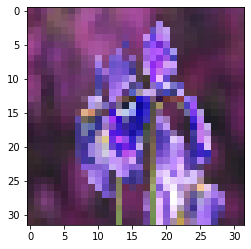

In [91]:
img=io.imread('E:/Dataset/course/BS6207/iris-flowers.jpg')
img=cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
plt.imshow(img)

Function define

In [101]:
#Achieve by scratch

def getMax(arr):
    imax=arr.shape[0]
    jmax=arr.shape[1]
    max_num=arr[0][0]
    for i in range(0,imax):
        for j in range(0,jmax):
            max_num=max([max_num,arr[i][j]])
    return max_num

def MaxPool2D(img):
    imax=img.shape[0]
    jmax=img.shape[1]
    channel=img.shape[2]
    output=np.zeros((imax-1,jmax-1,channel))
    for i in range(0,imax-1):
        for j in range(0,jmax-1):
            for k in range(0,channel):
                output[i,j,k]=getMax(img[i:i+2,j:j+2,k])
    return output
        
def getAvg(arr):
    imax=arr.shape[0]
    jmax=arr.shape[1]
    sum_num=0
    for i in range(0,imax):
        for j in range(0,jmax):
            sum_num=sum([sum_num,arr[i][j]])
    return sum_num/4

def AvgPool2D(img):
    imax=img.shape[0]
    jmax=img.shape[1]
    channel=img.shape[2]
    output=np.zeros((imax-1,jmax-1,channel))
    for i in range(0,imax-1):
        for j in range(0,jmax-1):
            for k in range(0,channel):
                output[i,j,k]=getAvg(img[i:i+2,j:j+2,k])
    return output

def Conv2d(w,img,b):
    output_channels=w.shape[0]
    imax=img.shape[0]
    jmax=img.shape[1]
    input_channels=img.shape[2]
    output=np.zeros((imax-2,jmax-2,output_channels))

    for i in range(0,imax-2):
        for j in range(0,imax-2):
            for k in range(0,output_channels):
                output[i,j,k]=sum(sum(w[k,0]*img[i:i+3,j:j+3,0]))+sum(sum(w[k,1]*img[i:i+3,j:j+3,1]))+sum(sum(w[k,2]*img[i:i+3,j:j+3,2]))+b[k]
    
    return output

def Conv2d_2(w,img,b,stride):
    output_channels=w.shape[0]
    imax=img.shape[0]//stride-4
    jmax=img.shape[1]//stride-4
    input_channels=img.shape[2]
    output=np.zeros((imax,jmax,output_channels))

    for i_new in range(0,imax):
        for j_new in range(0,imax):
            i=i_new*2
            j=j_new*2
            for k in range(0,output_channels):
                res=0
                for l in range(0,input_channels):
                    x=np.array([
                                [img[i  ,j,l],img[i  ,j+2,l],img[i  ,j+4,l],img[i  ,j+6,l],img[i  ,j+8,l]],
                                [img[i+2,j,l],img[i+2,j+2,l],img[i+2,j+4,l],img[i+2,j+6,l],img[i+2,j+8,l]],
                                [img[i+4,j,l],img[i+4,j+2,l],img[i+4,j+4,l],img[i+4,j+6,l],img[i+4,j+8,l]],
                                [img[i+6,j,l],img[i+6,j+2,l],img[i+6,j+4,l],img[i+6,j+6,l],img[i+6,j+8,l]],
                                [img[i+8,j,l],img[i+8,j+2,l],img[i+8,j+4,l],img[i+8,j+6,l],img[i+8,j+8,l]]
                                ])
                    res=res+sum(sum(w[k,l]*x))
                output[i_new,j_new,k]=res+b[k]
    
    return output

def trans_conv(X, K):
    h, w = K.shape
    Y = np.zeros((X.shape[0] + h - 1, X.shape[1] + w - 1))
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Y[i:i + h, j:j + w] += X[i, j] * K
    return Y

def ConvTranspose2d(w,img,b):
    input_channels=w.shape[0]
    output_channels=w.shape[1]
    imax=img.shape[0]
    jmax=img.shape[0]
    output=np.zeros((imax+2,jmax+2,output_channels))    
    for out_c in range(0,output_channels):
        output[:,:,out_c] += trans_conv(img[:,:,0],w[0,out_c]) + trans_conv(img[:,:,1],w[1,out_c]) + trans_conv(img[:,:,2],w[2,out_c]) + b[out_c]
    
    return output

def Batch_Normalization(img,mean,std,eps):
    h,w,c=img.shape
    output=np.zeros((h,w,c))
    output[:,:,0]+=(img[:,:,0]-mean[0])/math.sqrt(std[0]+eps)
    output[:,:,1]+=(img[:,:,1]-mean[1])/math.sqrt(std[1]+eps)
    output[:,:,2]+=(img[:,:,2]-mean[2])/math.sqrt(std[2]+eps)
    return output

def Sigmoid(img):
    return 1/(1+np.exp(-img))

def Flatten(img):
    imax=img.shape[0]
    jmax=img.shape[1]
    channels=img.shape[2]
    output=[]

    for c in range(0,channels):
        for i in range(0,imax):
            for j in range(0,jmax):
                output.append(img[i,j,c])
    return np.array(output)

def CrossEntropyLoss(p, y):
    return -math.log(math.exp(p[y])/sum(np.exp(p)))

def CrossEntropy(img,target):
    w,h=target.shape
    res=0
    for i in range(0,32):
        for j in range(0,32):
            res+=CrossEntropyLoss(img[i,j,:],target[i,j])

    return res/(w*h)

def mseloss2(pred,y):
    return sum((pred-y)**2)/pred.shape[0]

def MSELoss(img,target):
    w,h=target.shape
    res=0
    for i in range(0,32):
        for j in range(0,32):
            res+=mseloss2(img[i,j],target[i,j])
    return res/(w*h)

def outputimg(output_img):
    channel=output_img.shape[2]
    for i in range(0,channel):
        plt.figure()
        plt.imshow(output_img[:,:,i])
        
def compare(img,img2):
    channel=img.shape[2]
    result=True
    for i in range(0,channel):
        result=(result and (img[:,:,i]==img2[:,:,i]).all())
    return "The result is "+str(result)

 Maxpool2D


In [13]:
import torch

In [11]:
#Reshape the image
img_temp=np.swapaxes(np.swapaxes(img,1,2),0,1)
img_temp=img_temp.reshape(1,img_temp.shape[0],img_temp.shape[1],img_temp.shape[2])

In [94]:
img2=torch.tensor(img_temp).float()
t1=torch.nn.MaxPool2d(kernel_size=2,stride=1,padding=0,dilation=1, return_indices=False, ceil_mode=False)

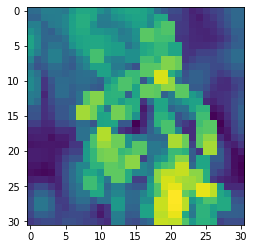

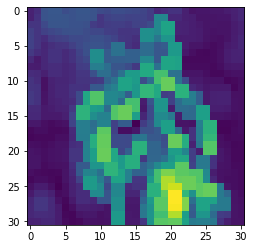

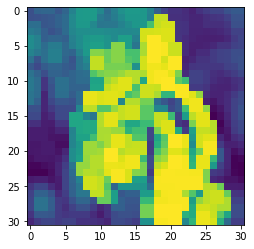

In [95]:
output=t1(img2)
output=output.data.numpy()
for i in output:
    for j in range(0,output.shape[1]):
        plt.figure()
        plt.imshow(i[j])
output=output[0]
output=np.swapaxes(output,0,2)
output=np.swapaxes(output,0,1)

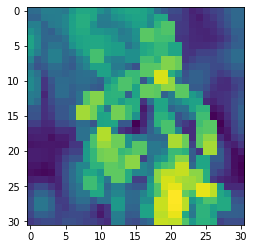

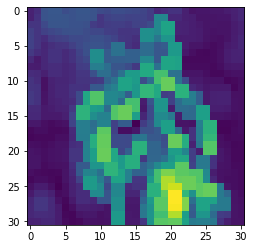

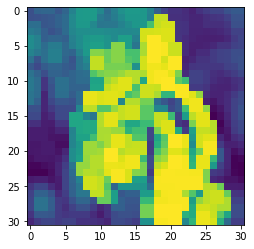

In [20]:
output2=MaxPool2D(img)
outputimg(output2)

In [102]:
compare(output,output2)

'The result is True'

 Average Pooling

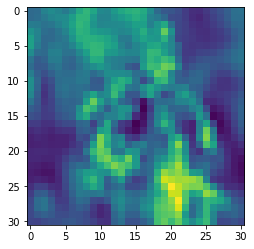

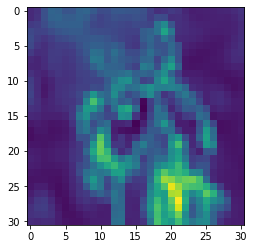

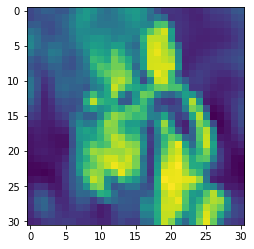

In [104]:
#Reapet the same process 

t2=torch.nn.AvgPool2d(kernel_size=2, stride=1, padding=0,ceil_mode=False, count_include_pad=True,divisor_override=None)

output=t2(img2)
output=output.data.numpy()
for i in output:
    for j in range(0,output.shape[1]):
        plt.figure()
        plt.imshow(i[j])
output=output[0]
output=np.swapaxes(output,0,2)
output=np.swapaxes(output,0,1)

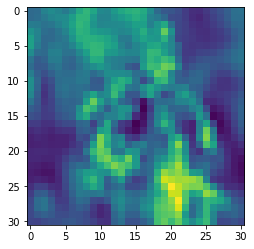

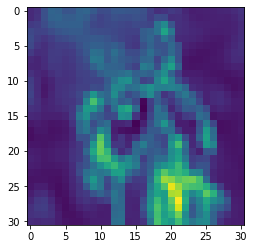

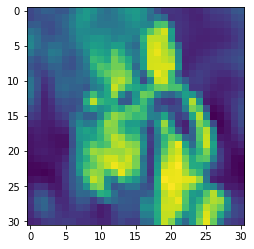

In [24]:
output3=AvgPool2D(img)
outputimg(output3)

In [105]:
compare(output,output3)

'The result is True'

Conv2d

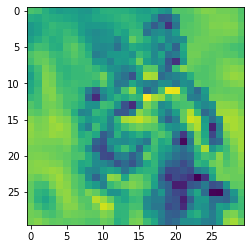

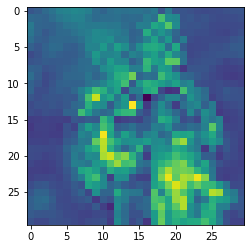

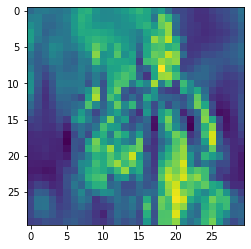

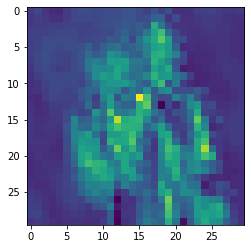

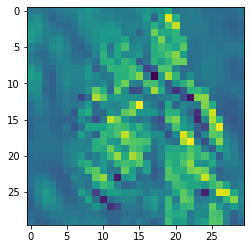

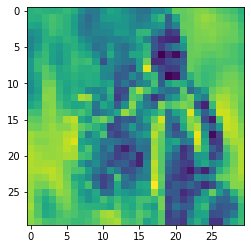

In [113]:
#Reapet the same process 

t3=torch.nn.Conv2d(in_channels=3, out_channels=6,kernel_size=3, stride=1, padding=0, dilation=1, groups=1,bias=True, padding_mode='zeros')

output=t3(img2)
output=output.data.numpy()
for i in output:
    for j in range(0,output.shape[1]):
        plt.figure()
        plt.imshow(i[j])
output=output[0]
output=np.swapaxes(output,0,2)
output=np.swapaxes(output,0,1)

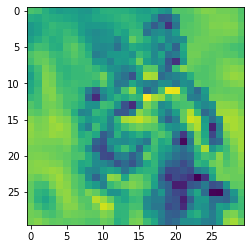

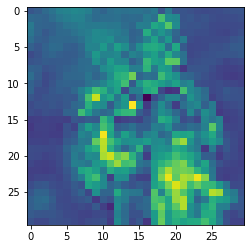

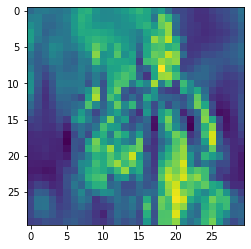

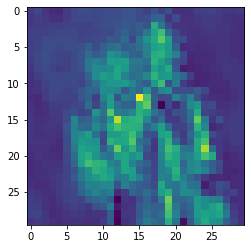

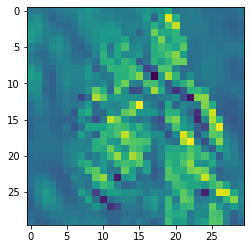

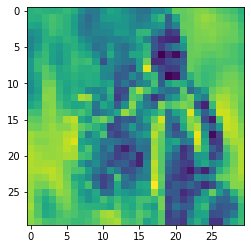

In [114]:
output4=Conv2d(t3.weight.data.numpy(),img,t3.bias.data.numpy())
outputimg(output4)

In [115]:
print((abs(output-output4)<0.001).all())  #Set the threshhold here, same as below

True


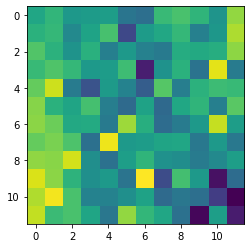

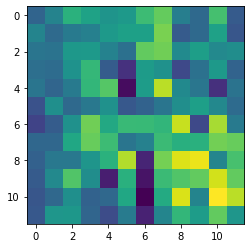

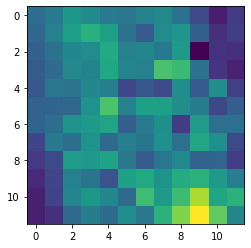

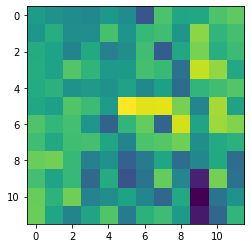

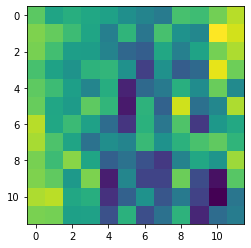

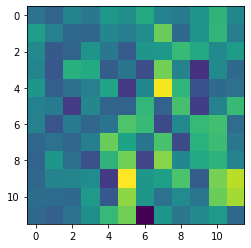

In [119]:
#Reapet the same process 

t4=torch.nn.Conv2d(in_channels=3, out_channels=6,kernel_size=5, stride=2, padding=0, dilation=2, groups=1,bias=True, padding_mode='zeros')
output=t4(img2)
output=output.data.numpy()
for i in output:
    for j in range(0,output.shape[1]):
        plt.figure()
        plt.imshow(i[j])
output=output[0]
output=np.swapaxes(output,0,2)
output=np.swapaxes(output,0,1)

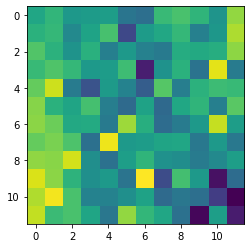

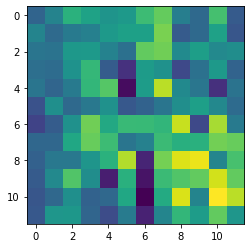

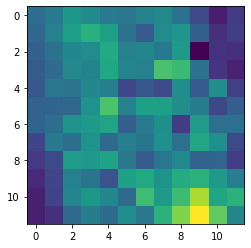

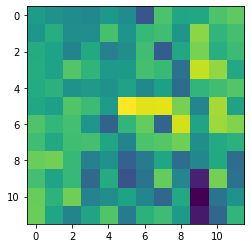

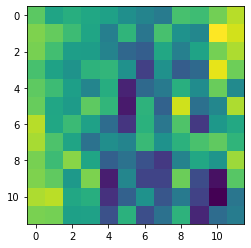

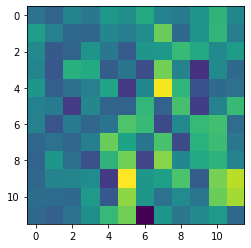

In [120]:
output5=Conv2d_2(t4.weight.data.numpy(),img,t4.bias.data.numpy(),2)
outputimg(output5)

In [122]:
print((abs(output-output5)<0.001).all())

True


ConvTranspose2d

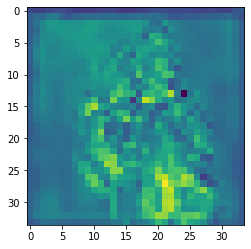

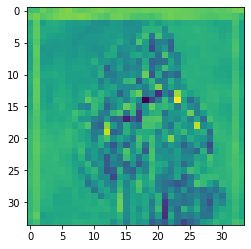

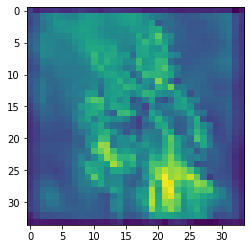

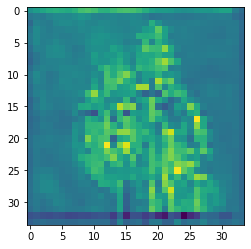

In [123]:
t5=torch.nn.ConvTranspose2d(in_channels=3, out_channels=4,kernel_size=3, stride=1, padding=0, output_padding=0,groups=1, bias=True, dilation=1, padding_mode='zeros')

output=t5(img2)
output=output.data.numpy()
for i in output:
    for j in range(0,output.shape[1]):
        plt.figure()
        plt.imshow(i[j])
output=output[0]
output=np.swapaxes(output,0,2)
output=np.swapaxes(output,0,1)

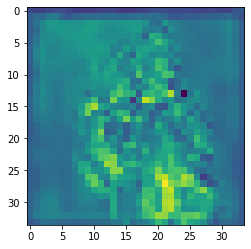

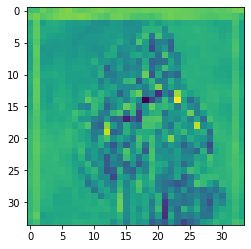

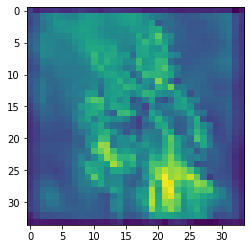

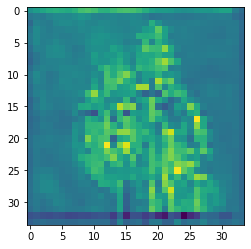

In [124]:
output6=ConvTranspose2d(t5.weight.data.numpy(),img,t5.bias.data.numpy())
outputimg(output6)

In [125]:
print((abs(output-output6)<0.001).all())

True


Flattern

In [39]:
t6=torch.flatten(img2, start_dim=0, end_dim=-1)
t6=np.array(t6)

In [40]:
output7=Flatten(img)

In [43]:
print((t6==output7).all())

True


Sigmoid

In [134]:
t7=torch.sigmoid(img2/255, out=None)
output=t7.data.numpy()[0]
output=np.swapaxes(output,0,2)
output=np.swapaxes(output,0,1)

In [135]:
output8=Sigmoid(img/255)

In [128]:
print((abs(output-output8)<0.001).all())

True


Batch norm

In [129]:
mean=torch.tensor([np.mean(img[:,:,0]),np.mean(img[:,:,1]),np.mean(img[:,:,2])]).float()
std=torch.tensor([np.std(img[:,:,0]),np.std(img[:,:,1]),np.std(img[:,:,2])]).float()
t8=torch.nn.functional.batch_norm(img2,running_mean=mean,running_var=std,weight=None, bias=None, training=False, momentum=0.1,eps=1e-05)

In [133]:
img3=t8.data.numpy()[0]
img3=img3.swapaxes(0,2)
img3=img3.swapaxes(0,1)

In [131]:
output9=Batch_Normalization(img,mean.data.numpy(),std.data.numpy(),1e-05)

In [132]:
print((abs(img3-output9)<0.001).all())

True


cross entropy

In [74]:
target=torch.randint(0,3,(1,32,32))
t9=torch.nn.functional.cross_entropy(img2/255, target, weight=None,size_average=None, ignore_index=-100, reduce=None,reduction='mean')

In [80]:
output9=CrossEntropy(img/255,target[0].data.numpy())

In [81]:
t9

tensor(1.1042)

In [82]:
output9

1.104176772274189

MSE LOSS

In [85]:
t10=torch.nn.functional.mse_loss(img2/255, target, size_average=None,reduce=None, reduction='mean')

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Using a target size (torch.Size([1, 32, 32])) that is different to the input size (torch.Size([1, 3, 32, 32])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  """Entry point for launching an IPython kernel.


In [87]:
output10=MSELoss(img/255,target[0].data.numpy())

In [88]:
output10

1.0374092396353969

In [89]:
t10

tensor(1.0374)